# How does the delay probability in the NYC subway system correlate with the total number of trains?
NOTE: a more detailed discussion of these data can be found at https://www.tobiasbartsch.com/numtrains-delays/

In the following, the delay probability (or delay percentage) refers to the probability that an individual subway train will encounter a delay while it is in transit to its next station.
The analyzed data spans the month of July 2019. Data were acquired every 20 to 30 seconds. Each plotted point refers to a snapshot of the subway system.

*The requested graph (Graph 2) is at the end of the notebook*

In [22]:
import pandas as pd
import numpy as np
import holoviews as hv
import pymc3 as pm
import arviz as az
hv.extension("matplotlib")
from holoviews.operation.datashader import datashade, dynspread
from theano import shared

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Load the data (see submitted code block on how this data frame was generated)

In [2]:
delaysdf = pd.read_csv('delaysdf_forTDI_v2.csv')
delaysdf.head()

,Unnamed: 0,time,delaypercent,day,hour,numtrains,weekday,north,category
0,0,1561939313,2.272727,6,20,473,0,1,1
1,1,1561939333,1.666667,6,20,479,0,1,1
2,2,1561939393,0.793651,6,20,476,0,0,0
3,3,1561939413,0.757576,6,20,476,0,0,0
4,4,1561939433,0.649351,6,20,475,0,1,1


In [54]:
max(delaysdf['time'])

1564849824

## We would like to link delay percentages to the total number of trains in the subway system using Bayesian inference.
To do that, first normalize the data

In [3]:
delaysdf['numtrains_norm'] = (delaysdf['numtrains']-np.mean(delaysdf['numtrains']))/np.std(delaysdf['numtrains'])
delaysdf['delaypercent_norm'] = (delaysdf['delaypercent'])/np.std(delaysdf['delaypercent'])

:Layout
   .DynamicMap.I  :DynamicMap   []
      :RGB   [x,y]   (R,G,B,A)
   .DynamicMap.II :DynamicMap   []
      :RGB   [x,y]   (R,G,B,A)
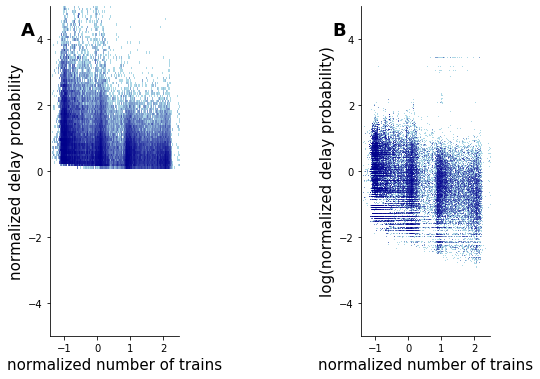

In [52]:
# Plot the data that we are about to fit
delayprob_vs_numtrains_plot = datashade(hv.Scatter((delaysdf['numtrains_norm'], (delaysdf['delaypercent_norm'])))).opts(fig_size=500, xlabel='normalized number of trains', ylabel='normalized delay probability', ylim=(-5, 5), fontsize=15) +\
datashade(hv.Scatter((delaysdf['numtrains_norm'], np.log(delaysdf['delaypercent_norm'])))).opts(fig_size=500, xlabel='normalized number of trains', ylabel='log(normalized delay probability)', ylim=(-5, 5), fontsize=15)

delayprob_vs_numtrains_plot

## Define and run the model

In [4]:
def run_multilevel_delays_vs_numtrains(categories, numtrains_norm, delaypercent_norm):  
    '''multilevel model to perform linear regression with log-normal likelihood of delays.
    Args: 
        categories (theano.shared)
        numtrains_norm (theano.shared)
        delaypercent_norm (theano.shared)
        
        the data should contain four categories:
        weekend, south: category 0
        weekend, north: category 1
        weekday, south: category 2
        weekday, north: category 3
    '''
    
    with pm.Model() as model:
        intercept_pop_mean = pm.Normal('intercept_pop_mean', mu=0, sd=0.5)
        a_numtrains_pop_mean = pm.Normal('a_numtrains_pop_mean', mu=0, sd=0.5)
       
        intercept = pm.Normal('intercept', mu=intercept_pop_mean, sd=2, shape=4) #one for each category
        a_num_trains = pm.Normal('a_num_trains', mu=a_numtrains_pop_mean, sd=2, shape=4) #also one for each category
        mu_delays = intercept[categories] + a_num_trains[categories] * numtrains_norm

        sigma = pm.HalfNormal('sigma', sd=2)
        delays = pm.Lognormal(name='delays', sd=sigma, mu=mu_delays, observed=delaypercent_norm)
        trace = pm.sample(1000, tune=1000, chains=2, cores=2)
    return(model, trace)

In [9]:
dels = shared(delaysdf['delaypercent_norm'].values)
numtrains_norm = shared(delaysdf['numtrains_norm'].values)
categories = shared(delaysdf['category'].values)

model, trace = run_multilevel_delays_vs_numtrains(categories, numtrains_norm, dels)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, a_num_trains, intercept, a_numtrains_pop_mean, intercept_pop_mean]
Sampling 2 chains: 100%|██████████| 4000/4000 [04:43<00:00, 14.09draws/s] 


## get summary of inference and inspect Markov Chains 

In [27]:
pm.summary(trace)

/home/tbartsch/anaconda3/envs/jup/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept_pop_mean,-0.082037,0.436313,0.007090,-0.942781,0.777855,4387.525331,0.999500
a_numtrains_pop_mean,-0.056962,0.462775,0.006984,-0.949709,0.813795,3596.605309,0.999500
intercept__0,-0.364136,0.005104,0.000106,-0.374090,-0.353944,2585.094797,0.999743
intercept__1,-0.472869,0.005186,0.000104,-0.482738,-0.462497,2565.491194,0.999530
intercept__2,-0.344407,0.002487,0.000039,-0.349339,-0.339516,4614.487764,0.999504
intercept__3,-0.412282,0.002420,0.000041,-0.417154,-0.407825,3808.217623,0.999507
a_num_trains__0,-0.376855,0.007716,0.000139,-0.392083,-0.361984,2742.298104,1.000299
a_num_trains__1,-0.299379,0.008017,0.000155,-0.315906,-0.283984,2527.805430,0.999506
a_num_trains__2,-0.267396,0.002267,0.000031,-0.272014,-0.263312,4559.283662,0.999524
a_num_trains__3,-0.171921,0.002269,0.000037,-0.176240,-0.167418,4040.116458,0.999871


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe36e9089e8>,
      dtype=object)

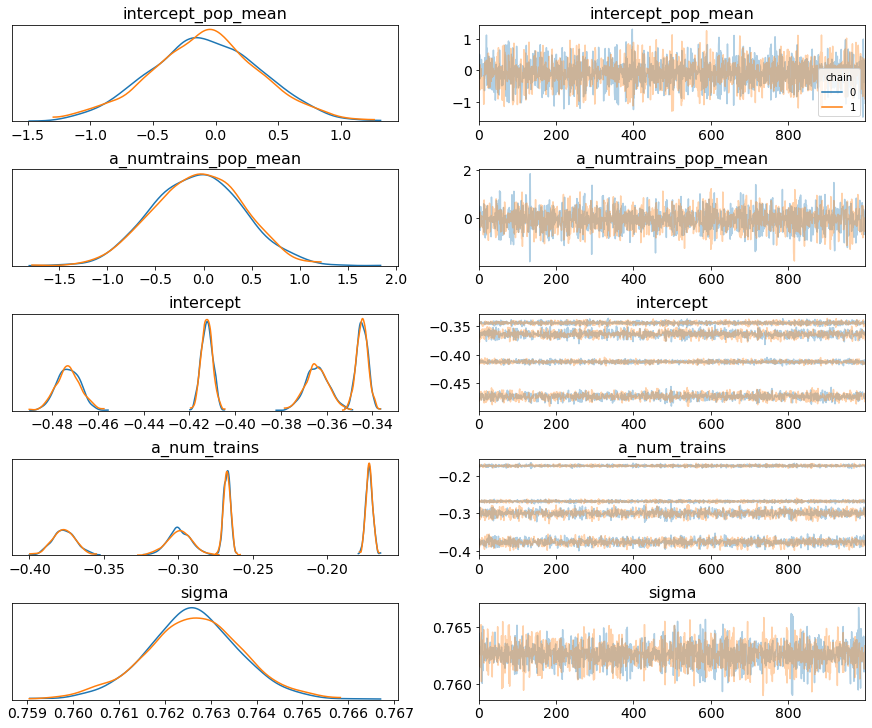

In [28]:
pm.plot_trace(trace, compact=True, legend=True)

## get posterior predictive samples

In [31]:
numtrains_norm.set_value(np.repeat(np.arange(-1, 2, 0.01), 4))
categories.set_value(np.tile(np.arange(4), len(np.arange(-1, 2, 0.01))))
posterior_predictive = pm.sample_posterior_predictive(model=model, trace=trace, samples=10000)

100%|██████████| 10000/10000 [01:20<00:00, 123.91it/s]


In [34]:
posterior_predictive['delays'].shape

(10000, 1200)

In [46]:
#populate a dataframe with the posterior samples
delays_pp_df = pd.DataFrame({'numtrains': numtrains_norm.get_value(),
                             'categories': categories.get_value(),
                             'delays_mean': np.log(np.mean(posterior_predictive['delays'], axis=0))[:], 
                             'delays_hpd_2.5': np.log(np.percentile(posterior_predictive['delays'],q=2.5, axis=0))[:],
                             'delays_hdp_97.5': np.log(np.percentile(posterior_predictive['delays'],q=97.5, axis=0))[:]
                            })

:DynamicMap   []
   :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B,A)
      .Area.I :Area   [x]   (y,y2)
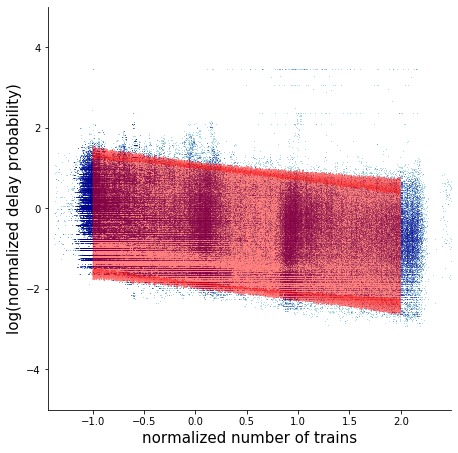

In [50]:
layout = datashade(hv.Scatter((delaysdf['numtrains_norm'], np.log(delaysdf['delaypercent_norm'])))).opts(fig_size=200, xlabel='normalized number of trains', ylabel='log(normalized delay probability)', ylim=(-5, 5), fontsize=15)*\
hv.Area((delays_pp_df['numtrains'], delays_pp_df['delays_hpd_2.5'], delays_pp_df['delays_hdp_97.5']), vdims=['y', 'y2']).opts(color='red',alpha=0.5, xlabel='time', ylabel='delay probability') 
layout

Graph 2: The log-delay probability of an individual train has a negative correlation with the total number of trains in the subway system. The slopes are given above (see summary of MCMC). Blue: data computed by tracking all trains in the subway system for one month (July 2019). Each datum refers to a snapshot of the system. Red: 95% confidence interval computed from posterior predictive samples.